<a href="https://colab.research.google.com/github/DanielTusingwire/CUU-Lab-2024/blob/main/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Collecting and preparing my dataset

data = pd.read_csv("/content/drive/MyDrive/SIMULATION_FINAL/Risk_Factors.csv")
df = pd.DataFrame(data)
df

,Year,Fatal,Serious,Minor,Risk_Factor,Total_Crashes
0,2020,1081,2611,1666,Population Behaviour,5358
1,2019,835,2587,1740,Population Behaviour,5162
2,2018,830,2698,2013,Population Behaviour,5541
3,2017,720,2951,2027,Population Behaviour,5698
4,2016,710,3245,2612,Population Behaviour,6567
...,...,...,...,...,...,...
125,2015,625,960,1396,Road environment,2981
126,2014,703,990,1292,Road environment,2985
127,2013,585,1008,1302,Road environment,2895
128,2012,621,1108,1242,Road environment,2971


In [ ]:
# Encoding the target variable (Risk_Factor) to turn into numeric values

label_encoder = LabelEncoder()
df['Risk_Factor'] = label_encoder.fit_transform(df['Risk_Factor'])

In [ ]:
df

,Year,Fatal,Serious,Minor,Risk_Factor,Total_Crashes
0,2020,1081,2611,1666,1,5358
1,2019,835,2587,1740,1,5162
2,2018,830,2698,2013,1,5541
3,2017,720,2951,2027,1,5698
4,2016,710,3245,2612,1,6567
...,...,...,...,...,...,...
125,2015,625,960,1396,2,2981
126,2014,703,990,1292,2,2985
127,2013,585,1008,1302,2,2895
128,2012,621,1108,1242,2,2971


In [ ]:
# defining the features X and the target y

X = df.drop(['Risk_Factor', 'Year'], axis=1)
y = df['Risk_Factor']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the model

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Preding the test set

y_pred = dt_classifier.predict(X_test)

# **b) Evaluate the model by producing the confusion matrix figure. (10 marks)**

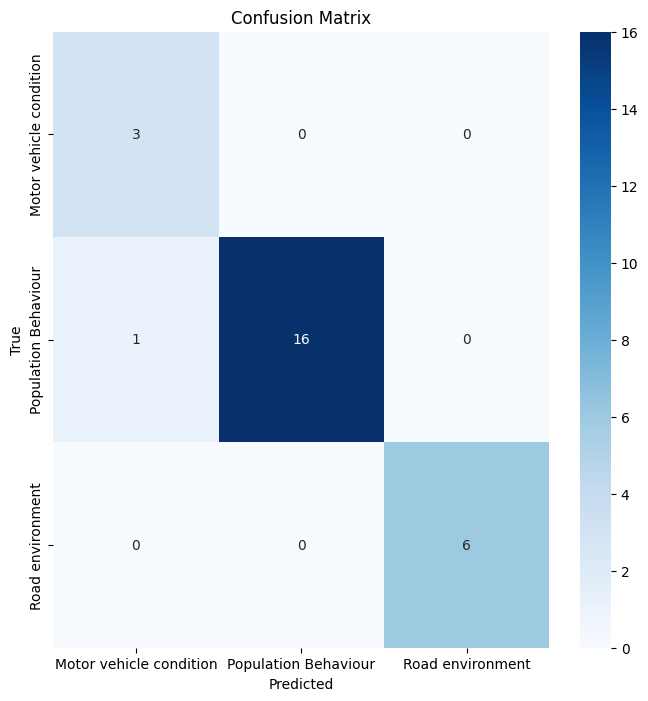

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cm

array([[ 3,  0,  0],
       [ 1, 16,  0],
       [ 0,  0,  6]])

# **c) State the values of recall, precision, F1-score, accuracy, and Jaccard index**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, jaccard_score

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating Jaccard index for each class and then average
jaccard = jaccard_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Classification Report:\n", classification_report_df)
print(f"Accuracy: {accuracy:.4f}")
print(f"Jaccard Index: {jaccard:.4f}")

# Extracting and printing individual metrics
recall = classification_report_df.loc['Population Behaviour', 'recall']
precision = classification_report_df.loc['Population Behaviour', 'precision']
f1_score = classification_report_df.loc['Population Behaviour', 'f1-score']

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1_score:.4f}")


Classification Report:
                          precision    recall  f1-score    support
Motor vehicle condition   0.750000  1.000000  0.857143   3.000000
Population Behaviour      1.000000  0.941176  0.969697  17.000000
Road environment          1.000000  1.000000  1.000000   6.000000
accuracy                  0.961538  0.961538  0.961538   0.961538
macro avg                 0.916667  0.980392  0.942280  26.000000
weighted avg              0.971154  0.961538  0.963703  26.000000
Accuracy: 0.9615
Jaccard Index: 0.8971
Recall: 0.9412
Precision: 1.0000
F1-score: 0.9697


# **Summary Results**
**Population Behaviour**

Recall: 0.9412

Precision: 1.0000

F1-score: 0.9697

**Motor Vehicle Condition**

Recall: 1.0000

Precision: 0.7500

F1-score: 0.8571


**Road Environment**

Recall: 1.0000

Precision: 1.0000

F1-score: 1.0000


**Overall Model Performance**

Accuracy: 0.9615

Jaccard Index: 0.8971



